# SPARKS FOUNDATION
## Decision Tree Classifier: Iris Dataset

by Dale Vacaro - 23 Feb 2022

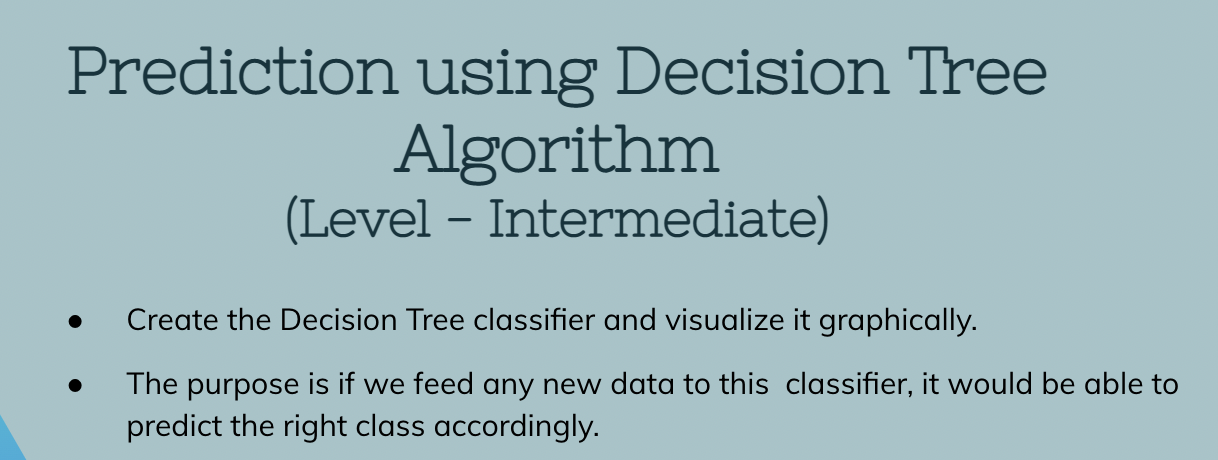

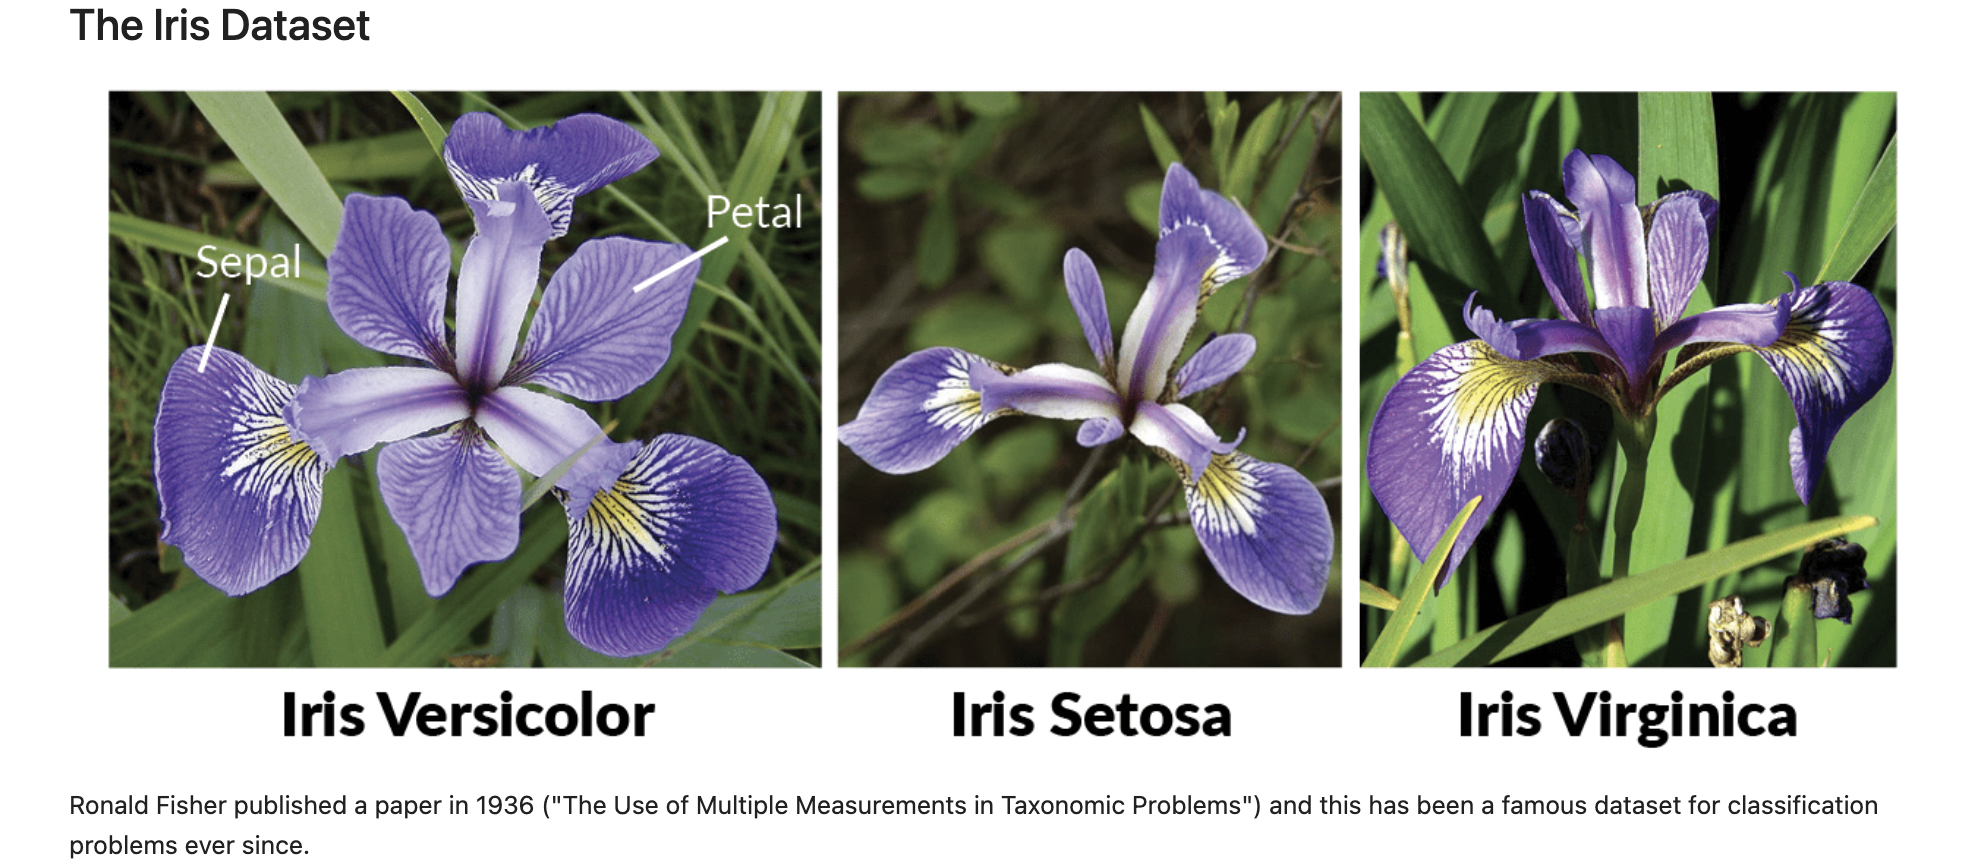

### Methodology

1.  Problem Statement
2.  Data Pre-Processing
3.  Exploratory Data Analysis
4.  Data Modeling & Evaluation
    * 4.1 Train Test Split
    * 4.2 Model/Algorithm Evaluation
    * 4.3 Linear Discriminant Analysis (LDA)
    * 4.4 Logistic Regression (LR)
    * 4.5 Decision Tree
    * 4.6 Features Importance


## 1. Problem Statement
    > Create the Decision Tree Classifier and Visualize it Graphically
    > The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

#### Import Libraries

In [442]:
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 2. Data Pre-Processing

In [310]:
iris_ = pd.read_csv("Iris.csv")
iris_.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [312]:
# Renaming Columns

iris_.rename(columns = {"SepalLengthCm":"sepal length (cm)", "SepalWidthCm":'sepal width (cm)',
                             "PetalLengthCm":'petal length (cm)', "PetalWidthCm":'petal width (cm)',
                       "Species":"class"},
                inplace=True)

In [313]:
# Dropping Unecessary Columns

iris_=iris_.drop(columns="Id")

In [340]:
# Changing Class to Categorical

iris_= iris_.replace(["Iris-setosa"],"0")
iris_= iris_.replace(["Iris-versicolor"],"1")
iris_= iris_.replace(["Iris-virginica"],"2")

# Changing Object to Integer
iris_["class"] = pd.to_numeric(iris_["class"], errors="coerce")
print(iris_["class"].unique())
print("____________________________________")
print(" SETOSA = 0")
print(" VERSICOLOR = 1")
print(" VIRGINICA = 2")

[0 1 2]
____________________________________
 SETOSA = 0
 VERSICOLOR = 1
 VIRGINICA = 2


In [326]:
iris_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [344]:
df= iris_
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

In [345]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [346]:
df.shape

(150, 5)

In [347]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int64
dtype: object

In [348]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       class  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

## 3. Exploratory Data Analysis

In [351]:
# Checking Classes

print(df.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


<AxesSubplot:>

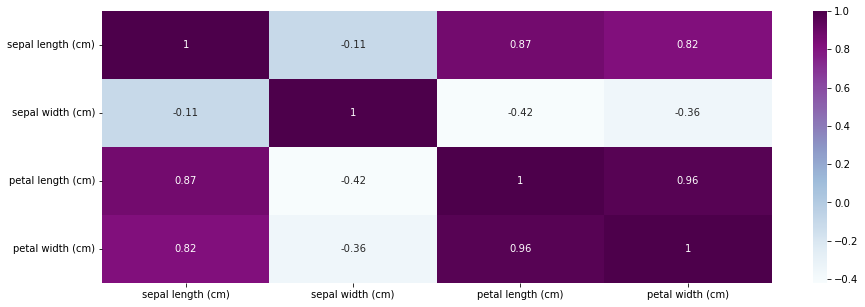

In [352]:
# Checking Correlation

df_cor = df.drop(columns="class")

plt.figure(figsize=(15,5))
sns.heatmap(df_cor.corr(), annot=True, cmap="BuPu")

###### 96% -- 'petal length (cm)' and 'petal width (cm)'
###### 87& -- 'petal length (cm)' and 'sepal length (cm)'
###### 82% -- 'petal width (cm)'and 'sepal length (cm)'

##### Checking Distribution of Top 3 Highest Correlation

Text(0.5, 1.0, 'Petal Width and Sepal Length (82% Corr)')

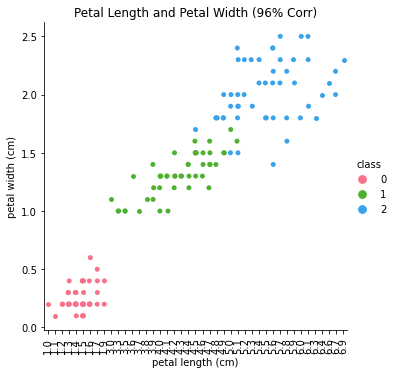

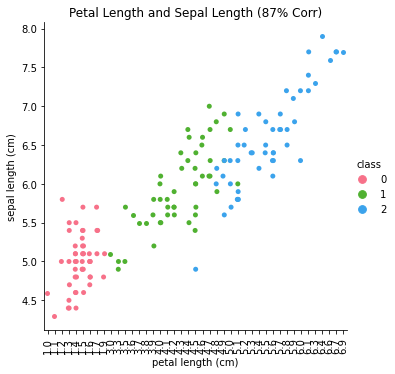

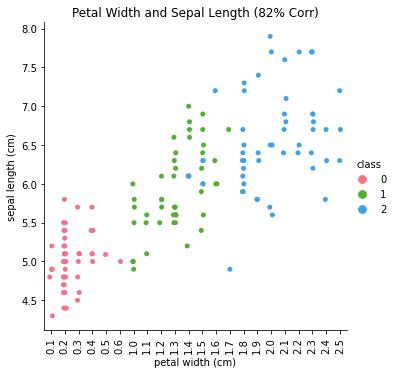

In [353]:
sns.catplot(x='petal length (cm)', y='petal width (cm)', hue="class", palette="husl", data=df)
plt.xticks(rotation=90);
plt.title("Petal Length and Petal Width (96% Corr)")


sns.catplot(x='petal length (cm)', y='sepal length (cm)', hue="class", palette="husl", data=df)
plt.xticks(rotation=90);
plt.title("Petal Length and Sepal Length (87% Corr)")

sns.catplot(x='petal width (cm)', y='sepal length (cm)', hue="class", palette="husl", data=df)
plt.xticks(rotation=90);
plt.title("Petal Width and Sepal Length (82% Corr)")


## 4. Data Modeling

### 4.1 Tran Test-Split

In [166]:
X = df.drop('class',axis=1)
Y = df['class']

test_size = 0.30
seed = 5

In [455]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                random_state=seed,
                                                test_size=test_size)

print("X_train : " + str(X_train.shape))
print("X_test  : " + str(X_test.shape))
print("Y_train : " + str(Y_train.shape))
print("Y_test  : " + str(Y_test.shape))

X_train : (105, 4)
X_test  : (45, 4)
Y_train : (105,)
Y_test  : (45,)


### 4.2 Model Evaluation

In [361]:
# Algorithms

models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Model Evaluation

results =[]
names=[]
for name , model in models:
    
    kfold=KFold(n_splits=5)
    cv_results= cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR:, 0.961905, (0.019048)
LDA:, 0.980952, (0.023328)
KNN:, 0.961905, (0.019048)
CART:, 0.952381, (0.030117)
NB:, 0.952381, (0.000000)
SVM:, 0.961905, (0.019048)


/Users/johndalevacaro/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/johndalevacaro/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

#### Top 2 Best Models are LDA and LR/KNN/SVM

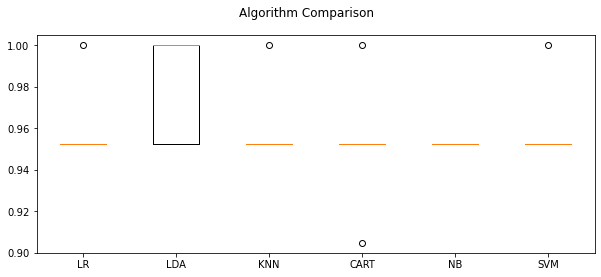

In [363]:
# Algorithm Comparison

fig= plt.figure(figsize=(10,4))
fig.suptitle('Algorithm Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 4.3 Linear Discriminant Analysis (LDA)

In [364]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions= LDA.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=['setosa (0)','versicolor(1)','virginica(2)']))

0.9555555555555556
               precision    recall  f1-score   support

   setosa (0)       1.00      1.00      1.00        15
versicolor(1)       0.94      0.94      0.94        16
 virginica(2)       0.93      0.93      0.93        14

     accuracy                           0.96        45
    macro avg       0.96      0.96      0.96        45
 weighted avg       0.96      0.96      0.96        45



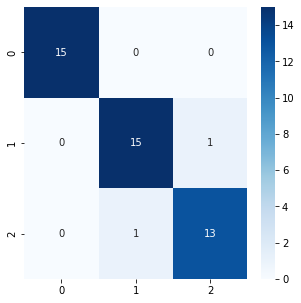

In [365]:
cm = confusion_matrix(Y_test, predictions)

cm_matrix = pd.DataFrame(data=cm)


fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues');

### 4.4 Logistic Regression (LR)

In [366]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions= LR.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=['setosa (0)','versicolor(1)','virginica(2)']))

0.9777777777777777
               precision    recall  f1-score   support

   setosa (0)       1.00      1.00      1.00        15
versicolor(1)       1.00      0.94      0.97        16
 virginica(2)       0.93      1.00      0.97        14

     accuracy                           0.98        45
    macro avg       0.98      0.98      0.98        45
 weighted avg       0.98      0.98      0.98        45



/Users/johndalevacaro/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


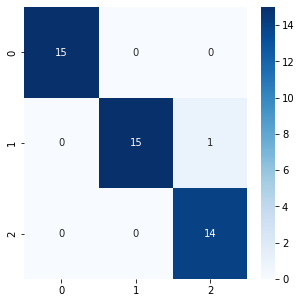

In [367]:
cm = confusion_matrix(Y_test, predictions)

cm_matrix = pd.DataFrame(data=cm)


fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues');

### 4.5 Decision Trees

In [478]:
# Criterion to Gini
clf = DecisionTreeClassifier(criterion="gini")

# Fitting
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [381]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion="gini",
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter="best")

DecisionTreeClassifier()

In [382]:
# Prediction
y_pred = clf.predict(X_test)

In [383]:
print("Accuracy Score on Train Data(gini): ", accuracy_score(y_true=Y_train, y_pred=clf.predict(X_train)))
print("Accuracy Score on Test Data(gini): ", accuracy_score(y_true=Y_test, y_pred=y_pred))

Accuracy Score on Train Data(gini):  1.0
Accuracy Score on Test Data(gini):  0.9111111111111111


In [391]:
# Change Criterion to Entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy")

# Fitting
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [392]:
# Predicting Labels on Test Set
y_pred_entropy = clf_entropy.predict(X_test)

In [463]:
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
print("Accuracy Score on Train Data(entropy): ", accuracy_score(y_true=Y_train, y_pred=clf_entropy.predict(X_train)))
print("Accuracy Score on Test Data(entropy): ", accuracy_score(y_true=Y_test, y_pred=y_pred_entropy))
print("-----------------------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------------------------------------------
Accuracy Score on Train Data(entropy):  1.0
Accuracy Score on Test Data(entropy):  0.9333333333333333
-----------------------------------------------------------------------------------------------------------------------------------------------


In [395]:
# Tuning Parameters
clf2 = DecisionTreeClassifier(criterion="entropy", min_samples_split=50)

#Fitting
clf2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

In [464]:
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
print("Accuracy Score on Train Data(entropy): ", accuracy_score(y_true=Y_train, y_pred=clf2.predict(X_train)))
print("Accuracy Score on Test Data(entropy): ", accuracy_score(y_true=Y_test, y_pred=clf2.predict(X_test)))
print("-----------------------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------------------------------------------
Accuracy Score on Train Data(entropy):  0.9714285714285714
Accuracy Score on Test Data(entropy):  0.9333333333333333
-----------------------------------------------------------------------------------------------------------------------------------------------


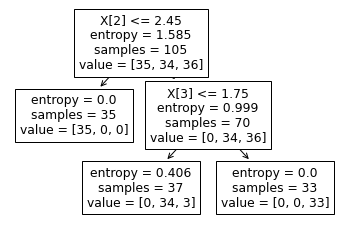

In [444]:
tree.plot_tree(clf2);

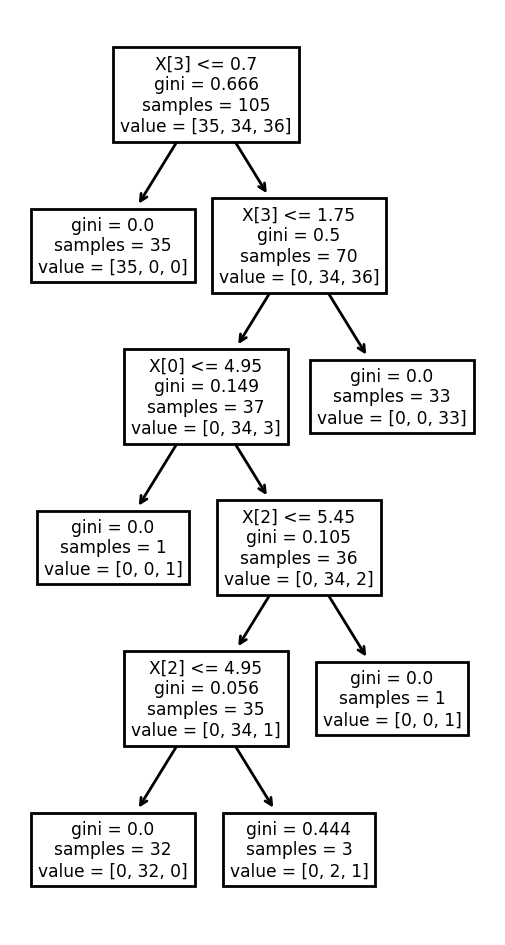

In [467]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,6), dpi = 200)

tree.plot_tree(clf);

In [446]:
# Feature Name
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

# Class Name
cn = ['setosa', 'versicolor', 'virginica']

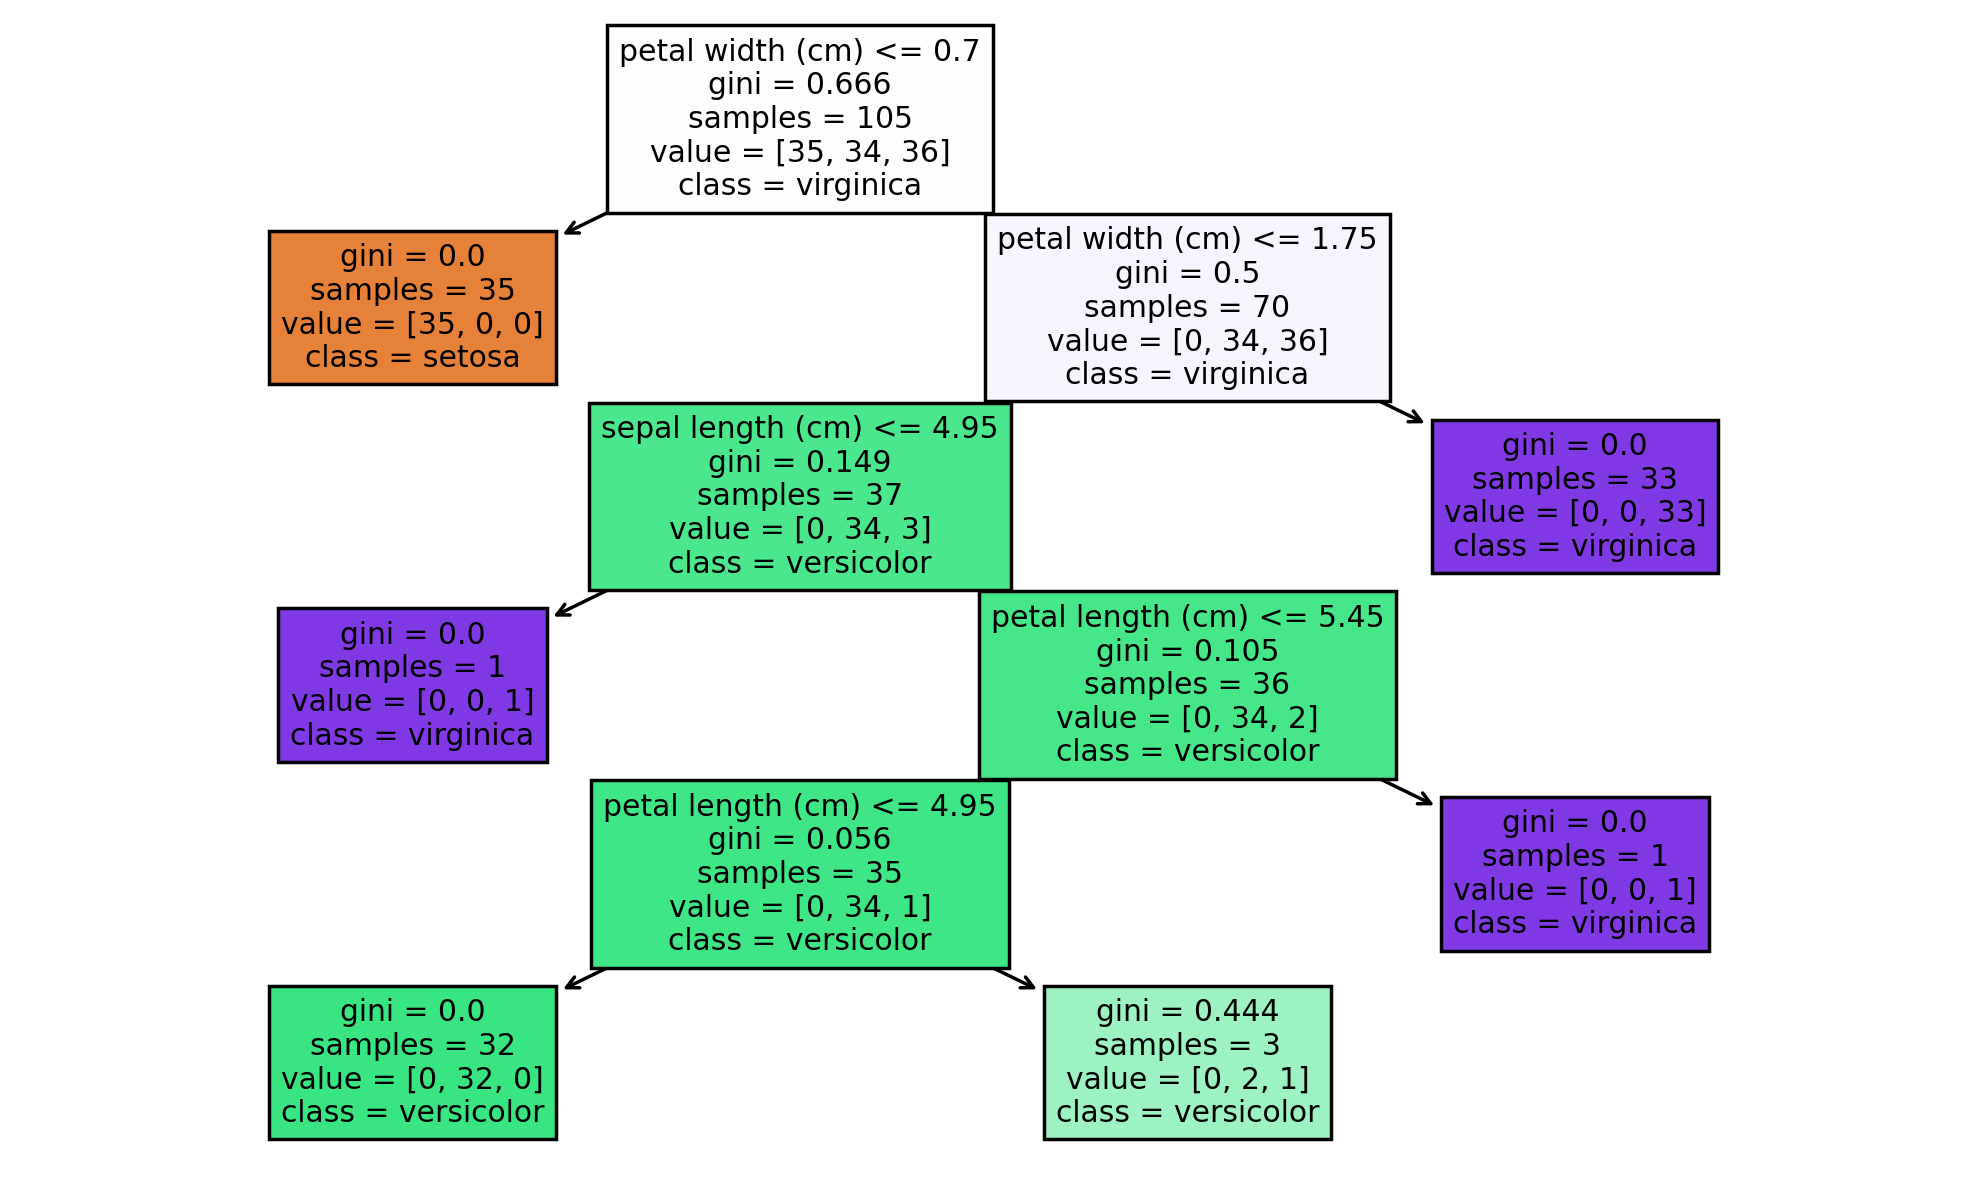

In [468]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6), dpi = 250)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Decision_Tree_.png')

In [453]:
# Max Depth
max_depth_range = list(range(1, 6))

# RMSE for Max-Depth
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)

    score = clf.score(X_test, Y_test)
    accuracy.append(score)

<ipython-input-454-f62911ef65bc>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklist)


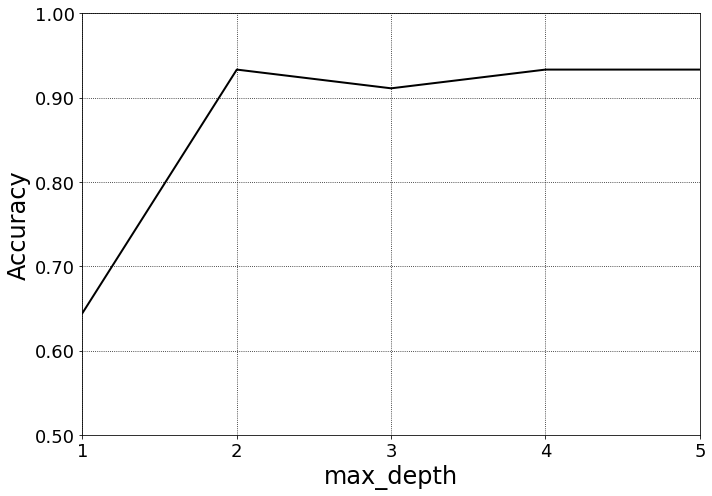

In [454]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()


### 4.6 Feature Importance

In [489]:
LR.coef_

array([[-0.39926733,  0.85344808, -2.23409237, -0.98889031],
       [ 0.5893469 , -0.42431132, -0.15231886, -0.91798534],
       [-0.19007957, -0.42913676,  2.38641123,  1.90687565]])

In [495]:
importance = LR.coef_[0]

# Summarize Feature Importance

for i,v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i,v))

Feature: 0, Score: -0.39927
Feature: 1, Score: 0.85345
Feature: 2, Score: -2.23409
Feature: 3, Score: -0.98889


<AxesSubplot:xlabel='Feature', ylabel='Score'>

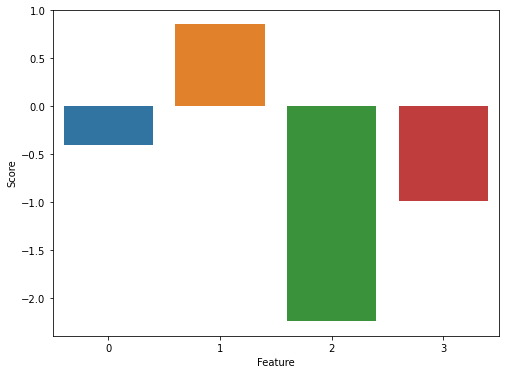

In [488]:
# Plot Feautre Importance

plt.figure(figsize=(8,6))
ax = sns.barplot(x=[x for x in range(len(importance))], y=importance)
ax.set(xlabel="Feature", ylabel="Score")
ax